In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation gold_data.corr()

SyntaxError: invalid syntax (3122821719.py, line 1)

In [10]:
correlation = gold_data.corr()

C:\Users\Default.DESKTOP-UBLD6TJ\AppData\Local\Temp\ipykernel_12804\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

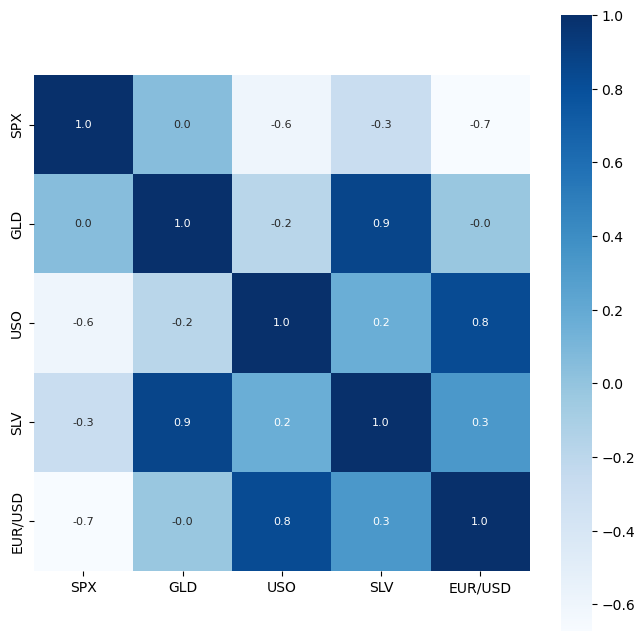

In [11]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Default.DESKTOP-UBLD6TJ\AppData\Local\Temp\ipykernel_12804\4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

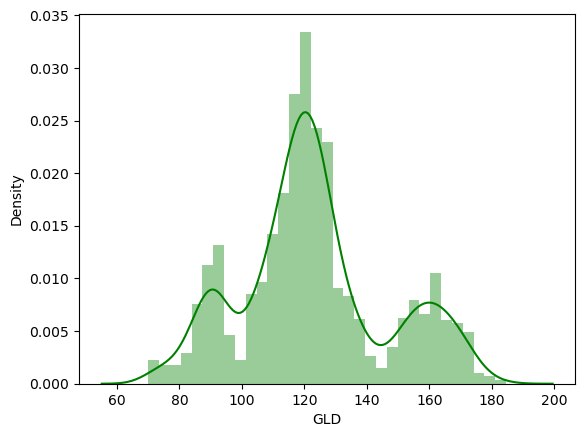

In [13]:
sns.distplot(gold_data['GLD'],color='green')

In [14]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [20]:
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.45909917  81.62200013 116.08870003 127.5797004  120.65480165
 154.76019773 150.82079893 125.97910015 117.2868989  125.80790114
 116.75770076 171.84820099 141.71499837 167.87369868 115.2904001
 117.86780067 140.13310241 169.77440013 159.58630315 159.13529899
 155.05579998 125.38539979 175.77219982 157.23770359 125.15020025
  93.6765994   77.85600031 120.51479996 119.08629958 167.32660051
  88.23540032 125.22310011  91.23330087 117.75709988 121.08109877
 136.23890053 115.53990138 114.73780066 146.84159896 107.30710122
 104.9663026   87.16999798 126.48170042 117.92769996 153.54279893
 119.70659994 108.37079963 107.9989984   93.04820031 127.05889806
  74.75700039 113.80359945 121.14180004 111.23299903 118.79169878
 120.8817989  159.64449988 167.10120131 147.09749676  85.7595987
  94.20910053  86.86629862  90.66930053 119.08210071 126.43650101
 127.58630001 169.83480029 122.3258991  117.34009884  98.82450051
 167.52520098 143.14209797 131.26920233 120.97020215 121.89299943
 119.6813008

In [22]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9899010974065173


In [23]:
Y_test = list(Y_test)

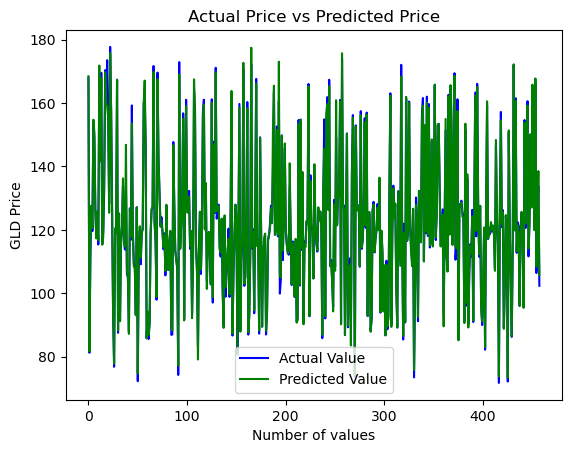

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [25]:
# Decision Tree

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [26]:
# predicting a new value
  
# test the output 
y_pred = regressor.predict(X_test)
y_pred

array([168.970001,  86.089996, 114.769997, 127.550003, 121.730003,
       155.669998, 149.149994, 126.809998, 117.389999, 125.620003,
       117.959999, 174.580002, 141.919998, 167.179993, 115.839996,
       116.730003, 134.100006, 168.5     , 159.570007, 138.220001,
       155.360001, 126.610001, 177.210007, 157.339996, 125.459999,
        93.720001,  73.080002, 122.290001, 119.220001, 167.990005,
        87.370003, 124.769997,  91.730003, 117.919998, 121.300003,
       135.410004, 114.57    , 115.800003, 134.119995, 105.720001,
       104.370003,  87.239998, 127.489998, 118.360001, 157.779999,
       119.959999, 108.419998, 107.839996,  93.459999, 128.539993,
        72.510002, 113.260002, 120.110001, 109.860001, 118.919998,
       120.730003, 161.320007, 161.520004, 146.869995,  85.199997,
        93.040001,  86.879997,  90.949997, 119.800003, 126.139999,
       127.400002, 173.490005, 122.970001, 116.209999,  97.550003,
       170.130005, 142.050003, 132.490005, 120.910004, 122.879

In [27]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)

print("R squared error : ", error_score)

R squared error :  0.9899010974065173


In [28]:
regressor.score(X_test, Y_test)

0.9854190298916252